
##  Descripcion de las pruebas TP FINAL Machine Learning 


# Dataset 

El dataset se encuentra en esta estructura de directorios en formato .jpg , imagenes de 430 * 430 en B/N para entrenamiento, validacion y testing .Se definieron 2 clases : 1 - Troquel Correcto (OK)  y 0 - Troquel Incorrecto (NOK) 


    data 
      I--> train 
             I----> 1 
             I----> 0 
             
      I--> valid 
             I----> 1 
             I----> 0   
             
      I--> test 
             I----> 1 
             I----> 0 
             
  
Las imagenes se preprocesaron utilizando OpenCV ( https://opencv.org/ ) para extraer las imagenes de los troqueles de las recetas originales. 


* 1-ML_TPFINAL_Imagenes_Troqueles_PREPROCESO.ipynb    
    

#  Prueba 1  (2-ML_TPFINAL_Imagenes_Troqueles_MODELO_CNN.ipynb) 

- Convolutional Neural Networks 
   
   Modelo 1 ( learning_rate_reduction , epochs=30 , optimizer = RMSprop, Sin aumentacion  ) 
   
    loss: 0.5446 - acc: 0.8065
   
   Modelo 2 ( learning_rate_reduction , epochs=30 , optimizer = RMSprop, con aumentacion )

    loss: 0.7004 - acc: 0.4912



# Prueba  2  (3-ML_TPFINAL_Imagenes_Troqueles_MODELO_CLF.ipynb)

- C-Support Vector Classification  

    C = 1.0
    model_clf = SVC(kernel='linear', C=C, probability=True, random_state=0)

    Train Accuracy: 0.8548
    Test Accuracy: 0.8871

- LogisticRegression

    C1 = 100000
    clf_logist_pol = LogisticRegression(C=C1, fit_intercept=False)

    Test Accuracy (Exactitud): 0.903225806452
    Train Accuracy (Exactitud): 0.935483870968

- Gaussian Naive Bayes

    clf = GaussianNB()
    clf.fit(trainData, trainLabels)

    Test Accuracy (Exactitud): 0.887096774194
    Train Accuracy (Exactitud): 0.924731182796

- Multi-layer Perceptron

    clf_MPL = MLPClassifier(solver='adam',hidden_layer_sizes=(50,),activation='relu',alpha=0.0, momentum=0, max_iter=1000, random_state=5)
    clf_MPL.fit(trainData, trainLabels)

    Test Accuracy (Exactitud): 0.935483870968
    Train Accuracy (Exactitud): 0.940860215054

    mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,solver='sgd', verbose=10, tol=1e-4, random_state=1,learning_rate_init=.1)
    mlp.fit(trainData, trainLabels)
    Test Accuracy (Exactitud): 0.887097
    Train Accuracy (Exactitud): 0.908602


# Prueba 3 (4-ML_TPFINAL_Imagenes_Troqueles_MODELO_KNN.ipynb)

- Classifier implementing the k-nearest neighbors

    model_KNN = KNeighborsClassifier(-1)
    grid = GridSearchCV(model_KNN, params)
    grid.fit(trainData, trainLabels)
    
    Test Accuracy (Exactitud): {:.2f}%  90.32258064516128
    Train Accuracy (Exactitud): {:.2f}%  95.16129032258065
    randomized search best parameters: {'n_neighbors': 3, 'metric': 'euclidean'}

    grid = RandomizedSearchCV(model_KNN, params)
    start = time.time()
    grid.fit(trainData, trainLabels)
    
    Test Accuracy (Exactitud): {:.2f}%  88.23529411764706
    Train Accuracy (Exactitud): {:.2f}%  91.699604743083
    randomized search best parameters: {'n_neighbors': 5, 'metric': 'cityblock'}
    
    

# Prueba 4 (5-ML_TPFINAL_Imagenes_Troqueles_MODELO_VGG16.ipynb)

- Transfer Learning Modelo pre-entrenado VGG16 ( Using Bottleneck Features for Multi-Class Classification in Keras ) , para clasificacion con pocos datos de training 

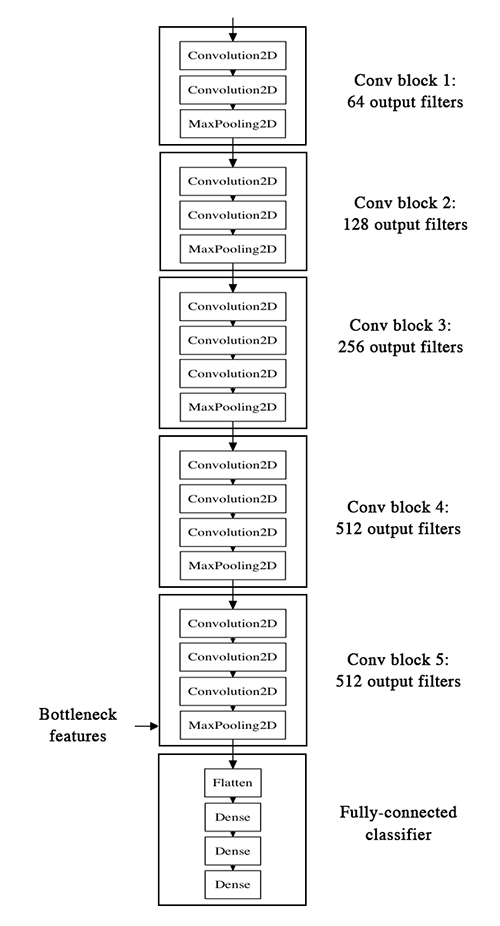




    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    accuracy: 0.9899
    Loss: 0.0442

 

# Conclusiones

Uno de los inconvenientes con los que me encontre es el tiempo para el pre-procesamiento de las imagenes para obtener los troqueles medicos a partir de las recetas. 
Se probaron una serie de modelos donde los valores obtenidos para las imagenes de test resultan bastante buenos . EN los modelos CNN sin aumento del set de datos tuve mejores resultados que aumentando el set de training. En pero en algunos modelos es muy lenta para entrenar por la cantidad de parametros. 
Me faltaron mas pruebas con modelos mas complejos , pero se probo tambien con un modelo pre-trained VGG16 aprovechando los pesos entrenados y agregando las capas densas full conected. 
